# LetsGrowMore Data Analytics Internship


### Task-4

# Stock Market Prediction and Forecasting using Stacked LSTM.

### Importing Libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Loading Data

In [9]:
#read the data set of "StockMarketData" in inp.
inp= pd.read_csv("StockMarket.csv")

In [10]:
inp.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,7/21/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,7/22/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,7/23/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,7/26/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,7/27/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
inp.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [12]:
inp.shape

(2035, 8)

In [13]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [14]:
inp.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [15]:
inp.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

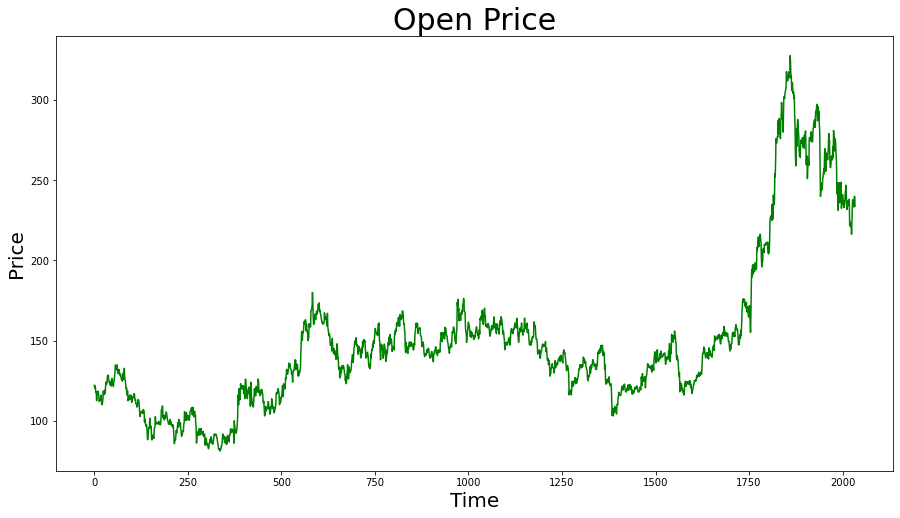

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(inp['Open'],'g')
plt.title('Open Price', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

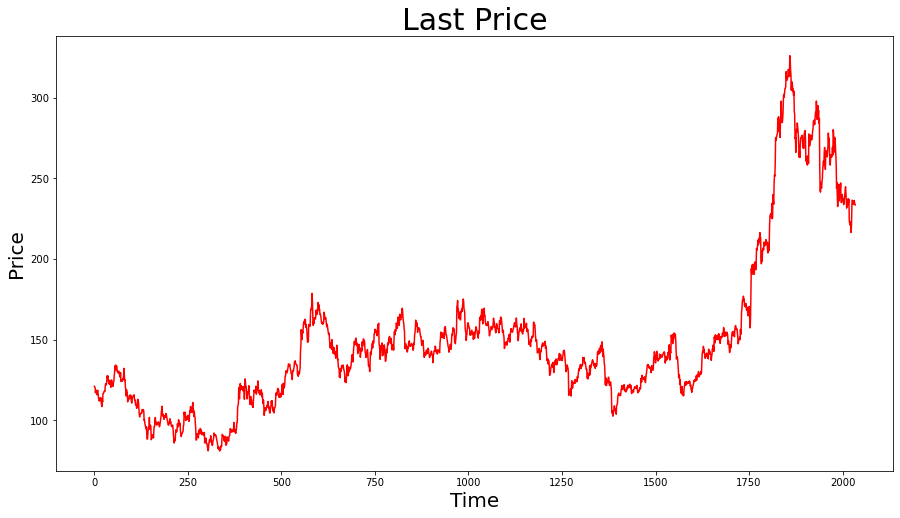

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(inp['Last'],'r')
plt.title('Last Price', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

## Prediction of Stock on Closed Price.

In [18]:
training_set = inp.iloc[:, 1:2].values

In [20]:
training_set.shape

(2035, 1)

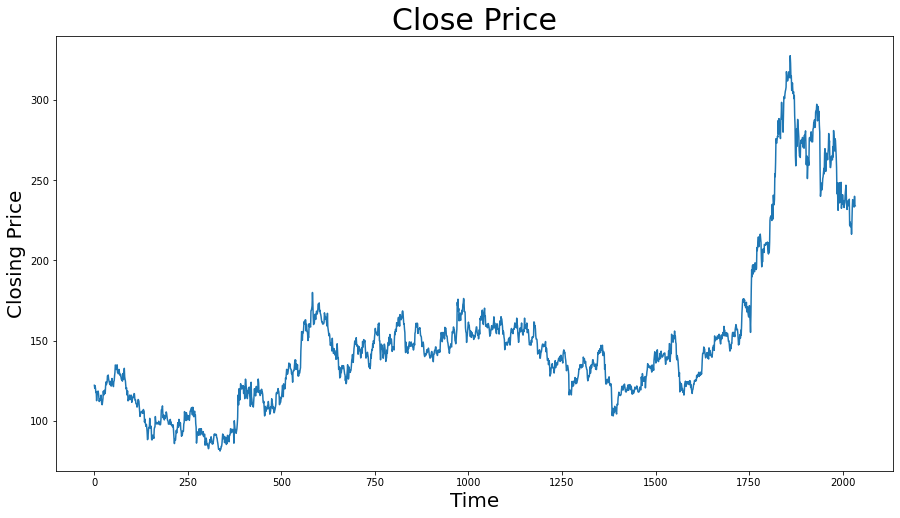

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(training_set)
plt.title('Close Price', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.show()

## Feature Scaling for optimal data performance.

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.array(training_set).reshape(-1,1))
training_set_scaled.shape

(2035, 1)

In [23]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the LSTM.

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 29s 140ms/step - loss: 0.0102
Epoch 2/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0033
Epoch 3/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0034
Epoch 4/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0027
Epoch 8/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0021
Epoch 13/100

62/62 [==============================] - 8s 123ms/step - loss: 7.2284e-04
Epoch 98/100
62/62 [==============================] - 8s 128ms/step - loss: 6.5332e-04
Epoch 99/100
62/62 [==============================] - 8s 123ms/step - loss: 6.2594e-04
Epoch 100/100
62/62 [==============================] - 8s 126ms/step - loss: 6.7425e-04


## Predicting Future Stock using the Test Set.

In [28]:
df = pd.read_csv('testdata.csv') 
real_stock_price = df.iloc[:, 1:2].values

In [29]:
df.shape

(16, 8)

In [32]:
dataset_total = pd.concat((inp['Open'], df['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Plotting the Results

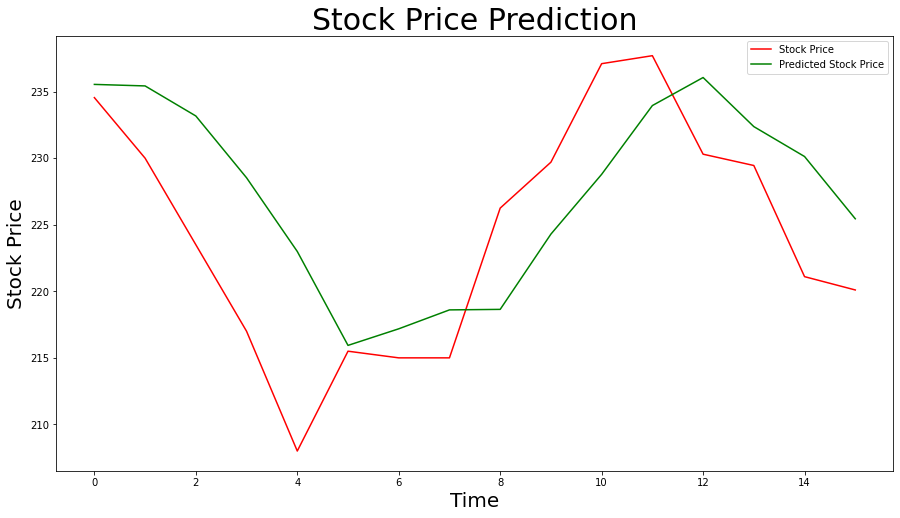

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(real_stock_price, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.legend()
plt.show()

## Done by- Mansi Singh